ML Model 2 Member Name: Yashwi Shah

ML Model 6 Member Name: Yashwi Shah & Dona Maria

In [ ]:
# ML Model 2 (Yashwi)
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

# Read CSV files into DataFrames
directory_path = '/content/drive/MyDrive/CS418_Project/data/Data_wStocks/'
data_2020_cleaned = pd.read_csv(directory_path + 'rank_name_symbol_2020.csv')
data_2021_cleaned = pd.read_csv(directory_path + 'rank_name_symbol_2021.csv')
data_2022_cleaned = pd.read_csv(directory_path + 'rank_name_symbol_2022.csv')
data_2023_cleaned = pd.read_csv(directory_path + 'rank_name_symbol_2023.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data_2021, data_2022, data_2023
data = pd.concat([data_2020_cleaned, data_2021_cleaned, data_2022_cleaned, data_2023_cleaned], ignore_index=True)

# Handling non-numeric values in the 'Profit' column
data['Profit'] = data['Profit'].str.replace('[\$,()]', '', regex=True).astype(float)
data['Profit'] = data['Profit'].apply(lambda x: 0 if x < 0 else x)

# Split data into features and target
X = data.drop(['Profit'], axis=1)  # Exclude target column 'Profit'
y = data['Profit']  # Set 'Profit' as the target variable

# Handling NaN values in the target variable 'y' (if any)
imputer_y = SimpleImputer(strategy='median')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numerical and categorical data.
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median to impute any missing values
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values for categories
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a random forest regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Define the parameter space for RandomizedSearch
param_distributions = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with error_score='raise' to debug
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42,
    error_score='raise'  # This will raise the actual exception
)

try:
    random_search.fit(X_train, y_train)
except ValueError as e:
    print(e)  # Printing the exception to get more details about the failure

# Get the best model after random search
best_model = random_search.best_estimator_

# Predict profit figures for the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance and best parameters
print(f'Best Model Parameters: {random_search.best_params_}')
print(f'R2 score: {r2}')
print(f'Mean Squared Error: {mse}')

Best Model Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': None}
R2 score: 0.7507126701986206
Mean Squared Error: 9896903.042146264


Constructed a Random Forest Regression model designed to predict profit based on the collected data set of features. I used past four years (2020-2023) of data into a dataframe and clearned required columns accordingly. The dataset is then split into training and testing sets, with preprocessing pipelines for numerical and categorical data. The numerical pipeline imputes missing values with the median and scales the features using standardization, while the categorical pipeline handles missing values by labeling them as 'missing' and performs one-hot encoding. To optimize model performance, hyperparameter tuning is conducted using RandomizedSearchCV. After fitting the model, I evaluates the performance using the test set, and computed the R2 score and mean squared error. The model achieved an R2 score of 0.7507, indicating a good fit to the data. The mean squared error is 9896903.0421, which is higher than normal, but after debugging and manipulating the data, I come to realize that the mean squared error could be improved with a larger dataset because after cleaning and filtering the the data, the model doesn't have enough data to better predict.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation Set Accuracy: 1.0
Test Set Accuracy: 1.0


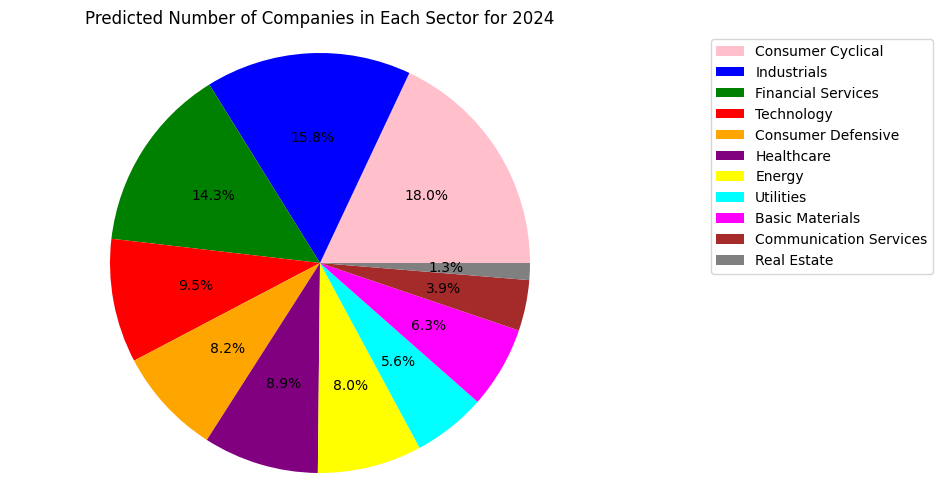

In [ ]:
# ML Model 6 (Yashwi & Dona)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/CS418_Project/RawData/CleanedData'

# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path + '/cleaned_data_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path + '/cleaned_data_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path + '/cleaned_data_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path + '/cleaned_data_2023.csv'))

# Concatenate DataFrames into one DataFrame
dataframes = [data_2020, data_2021, data_2022, data_2023]
combined_data = pd.concat(dataframes, ignore_index=True)

# Get sector performance by year
sector_performance_by_year = []

for df in dataframes:
    sector_performance = df['Sector'].value_counts()
    # Normalize sector names
    sector_performance.index = sector_performance.index.str.title()
    sector_performance_by_year.append(sector_performance)

combined_data = pd.concat(sector_performance_by_year, axis=1)

# Prepare the training data
X = combined_data.iloc[:, :-1]  # Features (counts of companies in each sector for years up to 2023)
Y = combined_data.iloc[:, -1]   # Target (counts of companies in each sector for 2023)

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Splitting train set into train and validation sets (60% train, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Initialize and train logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, Y_train)

#Prediction
val_predict = logistic_reg.predict(X_val)
test_predict = logistic_reg.predict(X_test)

val_score = logistic_reg.score(X_val, val_predict)
test_score = logistic_reg.score(X_test, test_predict)

print(f"Validation Set Accuracy: {val_score}")
print(f"Test Set Accuracy: {test_score}")

#Since we don't have data for 2024, let's assume X_test is data for 2024
predicted_performance_2024 = logistic_reg.predict(X_train)
sectors = combined_data.index

# Concatenate sector_performance_by_year into a single DataFrame
combined_data = pd.concat(sector_performance_by_year, axis=1)

# Prepare the training data
X_train = combined_data.iloc[:, :-1]  # Features (counts of companies in each sector for years up to 2023)
y_train = combined_data.iloc[:, -1]   # Target (counts of companies in each sector for 2023)

# Initialize and train logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Since we don't have data for 2024, let's assume X_train is data for 2024
predicted_performance_2024 = logistic_reg.predict(X_train)
sectors = combined_data.index

predicted_2024_df = pd.DataFrame({'Sector': sectors, 'Predicted Companies': predicted_performance_2024})
palette = ['pink', 'blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

import matplotlib.pyplot as plt

# Plot a pie chart of predicted performance for 2024
plt.figure(figsize=(8, 6))
plt.pie(predicted_2024_df['Predicted Companies'], autopct='%1.1f%%', colors=palette)
plt.title('Predicted Number of Companies in Each Sector for 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(predicted_2024_df['Sector'], loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()